## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).



8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9.  **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.

Number 3

11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets
ckd = pd.concat([chronic_kidney_disease.data.features ,chronic_kidney_disease.data.targets],axis=1)

print(chronic_kidney_disease.variables) 

     name     role         type demographic              description  \
0     age  Feature      Integer         Age                     None   
1      bp  Feature      Integer        None           blood pressure   
2      sg  Feature  Categorical        None         specific gravity   
3      al  Feature  Categorical        None                  albumin   
4      su  Feature  Categorical        None                    sugar   
5     rbc  Feature       Binary        None          red blood cells   
6      pc  Feature       Binary        None                 pus cell   
7     pcc  Feature       Binary        None          pus cell clumps   
8      ba  Feature       Binary        None                 bacteria   
9     bgr  Feature      Integer        None     blood glucose random   
10     bu  Feature      Integer        None               blood urea   
11     sc  Feature   Continuous        None         serum creatinine   
12    sod  Feature      Integer        None                   so

From the dataset we've been given, our main task is to determine whether someone has chronic kidney disease (CKD) or not. The dataset includes various measurements and test results which might help us identify whether a patient has CKD.

2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

To prepare the data for analysis

* categorical variables should be translated into numerical variables. LableEncoder is used.
* Records with missing values is removed

In [17]:
from sklearn.preprocessing import LabelEncoder

# remove NaN values
ckd_transform = ckd.dropna()

# Applying label encoding to categorical variables
label_encoders = {}
categorical_col = list(ckd_transform.select_dtypes(include=['object']).columns)
le = LabelEncoder()
for col in categorical_col:
    ckd_transform[col] = le.fit_transform(ckd_transform[col].astype(str))


C:\Users\jzhan\AppData\Local\Temp\ipykernel_9236\3678713295.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ckd_transform[col] = le.fit_transform(ckd_transform[col].astype(str))


3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [19]:
print(ckd.shape)

(400, 25)


In [20]:
ckd.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [18]:
ckd.describe(include='all').transpose()

(400, 25)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,391.0,NaN,NaN,NaN,51.483376,17.169714,2.0,42.0,55.0,64.5,90.0
bp,388.0,NaN,NaN,NaN,76.469072,13.683637,50.0,70.0,80.0,80.0,180.0
sg,353.0,NaN,NaN,NaN,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,NaN,NaN,NaN,1.016949,1.352679,0.0,0.0,0.0,2.0,5.0
su,351.0,NaN,NaN,NaN,0.450142,1.099191,0.0,0.0,0.0,0.0,5.0
rbc,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pc,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcc,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ba,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bgr,356.0,NaN,NaN,NaN,148.036517,79.281714,22.0,99.0,121.0,163.0,490.0


* Observation Count and Variables: The dataset contains 158 rows and 25 columns
* There are missing values (NaN) in many columns. For example, several key variables such as sg (specific gravity), al (albumin), and su (sugar) showed substantial missing data in observations. This is critical because they are important for diagnosing kidney diseases.
* Data Types: Most variables related to medical measurements like blood pressure (bp), glucose levels (bgr), and others are floating point numbers. Variables like rbc (red blood cells) and pc (pus cell) are categorical, initially with text values which we converted to numerical codes.

4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

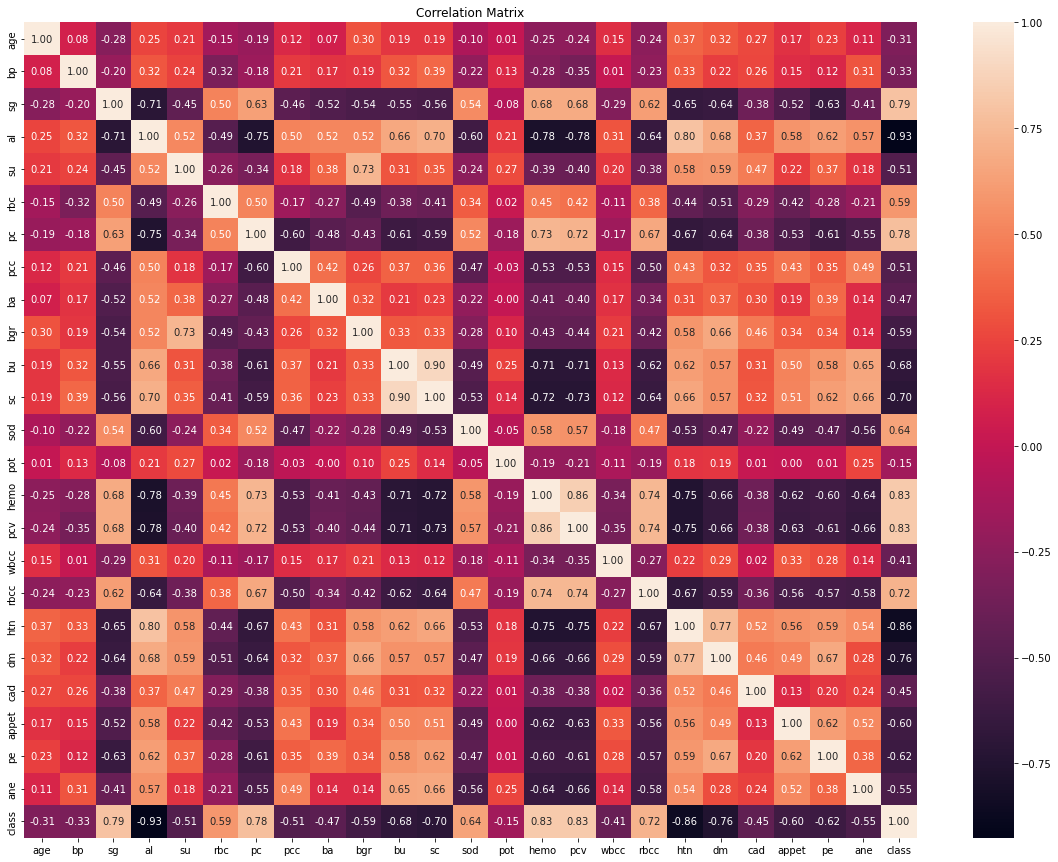

In [21]:
correlation_matrix = ckd_transform.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Answer: 

Hemoglobin and Packed Cell Volume (PCV): There is a very strong positive correlation between 'hemo' (hemoglobin) and 'pcv' (packed cell volume). Since both are indicators of the blood's ability to carry oxygen, they typically increase or decrease together.

Red Blood Cell Count (RBCC) and Hemoglobin (Hemo): A strong positive correlation exists between 'rbcc' and 'hemo'. These measures are linked to the blood's oxygen-carrying capacity, and typically, a lower hemoglobin level corresponds with a reduced red blood cell count.

Albumin (Al) and Blood Urea (Bu): A positive correlation is observed between these variables, suggesting that higher albumin levels in the urine, which may indicate reduced kidney function, are associated with increased blood urea levels due to the kidney's diminished ability to filter urea.

5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

We should remove all the records that has missing values, instad of using imputed values, for the following reasons:

* Imputation introduces estimated values based on assumptions or patterns observed in other data. In health contexts, where every variable can be crucial and highly individual-specific, these estimates might not accurately represent the true state or condition of a patient. This could lead to incorrect conclusions or treatment decisions.

* Imputation methods themselves may introduce bias, particularly if the missing value is not random but related to certain unseen factors. If the method or the data used for imputation does not account for these factors accurately, it can skew the model’s outputs.

* By removing incomplete records, it ensures that the model only learns from the most reliable, fully observed datasets. This is particularly important in clinical trials or scenarios where data quality is paramount for accurate predictions.

6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

We should keep the outlier, because:

* Outliers might signify rare diseases or unique complications that are not common in the general population. Removing these outliers could prevent the model from learning how to identify and treat these rare conditions.

* A predictive model trained on a dataset that includes outliers might develop a more robust understanding of the full spectrum of possible medical scenarios. 

7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

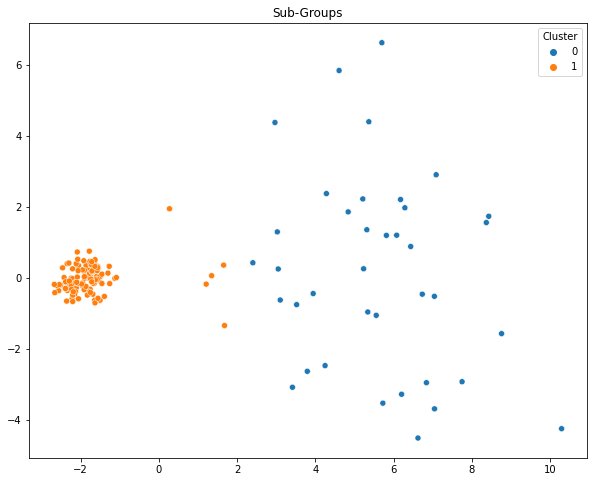

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = ckd_transform.drop(columns='class')
y = ckd_transform['class']
norm_transformer = StandardScaler()
X_normalized = norm_transformer.fit_transform(X)

# Configure and apply K-Means clustering
cluster_model = KMeans(n_clusters=2, random_state=1)
X_clusters = cluster_model.fit_predict(X_normalized)

# Setup and apply PCA
pca_transformer = PCA(n_components=2)
pca_results = pca_transformer.fit_transform(X_normalized)

# Plot the clustered data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], hue=X_clusters)
plt.title('Sub-Groups')
plt.legend(title='Cluster')
plt.show()

8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

In [29]:
from sklearn.model_selection import train_test_split
X = ckd_transform.drop('class', axis=1)
y = ckd_transform['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
